<a href="https://colab.research.google.com/github/NarciSource/Aivle--MiniProject-5-2/blob/main/3.%EB%8B%A8%EA%B3%84%EB%B3%84%20%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션

단계별로 나눠서 모델링을 수행하고자 합니다.  

* 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
* 단계2 : 세부 동작에 대한 분류모델 생성
    * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
    * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링
* 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 모든 모델링은 [다양한 알고리즘 + 성능 튜닝]을 수행해야 합니다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용

 <br/>  

* 세부 요구사항
    - data01_train.csv 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - data01_test.csv 를 불러와 'new_data' 이름으로 저장합니다.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aivle/mp5/data01_train.csv').drop('subject',axis=1)
new_data = pd.read_csv('/content/drive/MyDrive/aivle/mp5/data01_test.csv').drop('subject',axis=1)

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : data 에 Activity_dynamic 를 추가합니다. Activity_dynamic은 과제1에서 is_dynamic과 동일한 값입니다.
    - x와 y1, y2로 분할하시오.
        * y1 : Activity
        * y2 : Activity_dynamic
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
target = 'Activity'

In [ ]:
data['Activity_dynamic'] = data[target].map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                                            'WALKING':1, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':1})

In [ ]:
x = data.drop(columns=[target, 'Activity_dynamic'], axis=1)
y1 = data[target]
y2 = data['Activity_dynamic']
x.shape, y1.shape, y2.shape

((5881, 561), (5881,), (5881,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y1, valid_y1, train_y2, valid_y2 = train_test_split(x, y1, y2, train_size=.8, random_state=2023, stratify=y1)


## **3.단계별 모델링**

![](https://github.com/DA4BAM/image/blob/main/step%20by%20step.png?raw=true)

### (1) 단계1 : 정적/동적 행동 분류 모델

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

#### 1) 알고리즘1 :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

model_dt = DecisionTreeClassifier()
model_dt.fit(train_x, train_y2)
model_dt.score(valid_x, valid_y2)

0.9991503823279524

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(train_x, train_y2)
model_rf.score(valid_x, valid_y2)

0.9991503823279524

#### 2) 알고리즘2 :

In [ ]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier()
model_mlp.fit(train_x, train_y2)
model_mlp.score(valid_x, valid_y2)

0.9991503823279524

In [ ]:
model_1 = model_rf

### (2) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
static_data = data.loc[data['Activity_dynamic']==0]

In [ ]:
static_x = static_data.drop(columns=[target, 'Activity_dynamic'], axis=1)
static_y1 = static_data[target]

train_static_x, valid_static_x, train_static_y1, valid_static_y1 = train_test_split(static_x, static_y1, train_size=.8, random_state=2023, stratify=static_y1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(train_static_x, train_static_y1)
model_rf.score(valid_static_x, valid_static_y1)

0.9891808346213292

In [ ]:
model_2_1 = model_rf

### (3) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
dynamic_data = data.loc[data['Activity_dynamic']==1]

In [ ]:
dynamic_x = dynamic_data.drop(columns=[target, 'Activity_dynamic'], axis=1)
dynamic_y1 = dynamic_data[target]

train_dynamic_x, valid_dynamic_x, train_dynamic_y1, valid_dynamic_y1 = train_test_split(dynamic_x, dynamic_y1, train_size=.8, random_state=2023, stratify=dynamic_y1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(train_dynamic_x, train_dynamic_y1)
model_rf.score(valid_dynamic_x, valid_dynamic_y1)

0.9754716981132076

In [ ]:
model_2_2 = model_rf

### (4) 분류 모델 합치기


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들기

In [ ]:
def pipeline_predict(test, model_isDynamic, model_static, model_dynamic, output=False, cutted_feature=False):
    test['Activity_dynamic'] = test[target].map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                                                 'WALKING':1, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':1})

    df_index = pd.Series(range(len(new_data)))
    x = test.drop(columns=[target, 'Activity_dynamic'], axis=1)
    y1 = test[target]
    y2 = test['Activity_dynamic']

    ################ 모델1 예측평가
    pred_y2 = model_isDynamic.predict(x)
    if output:
        print('모델1 예측평가')
        print(classification_report(pred_y2, y2))
        print(accuracy_score(pred_y2, y2))


    ################ 모델2-1 예측

    splited_0_index = list(map(lambda y: y==1, pred_y2))
    dynamic_x = x.loc[splited_0_index]
    dynamic_x = dynamic_x.loc[:, cutted_feature] if len(cutted_feature) else dynamic_x
    dynamic_y1 = y1.loc[splited_0_index]
    dynamic_index = df_index.loc[splited_0_index]

    pre_dynamic_y = model_dynamic.predict(dynamic_x)
    if output:
        print('모델2-1 예측평가')
        print(classification_report(pre_dynamic_y, dynamic_y1))
        print(accuracy_score(pre_dynamic_y, dynamic_y1))

    ################ 모델2-2 예측

    splited_1_index = list(map(lambda y: y==0, pred_y2))
    static_x = x.loc[splited_1_index]
    static_x = static_x.loc[:, cutted_feature] if len(cutted_feature) else static_x
    static_y1 = y1.loc[splited_1_index]
    static_index = df_index.loc[splited_1_index]

    pre_static_y = model_static.predict(static_x)
    if output:
        print('모델2-2 예측평가')
        print(classification_report(pre_static_y, static_y1))
        print(accuracy_score(pre_static_y, static_y1))


    ################ 통합 예측

    sr_dynamic = pd.Series(pre_dynamic_y, index = dynamic_index)
    sr_static = pd.Series(pre_static_y, index = static_index)
    sr_merged = pd.concat([sr_dynamic, sr_static], axis=0).sort_index()
    if output:
        print('통합 예측평가')
        print(classification_report(sr_merged, y1))
        print(accuracy_score(sr_merged, y1))

    return accuracy_score(sr_merged, y1)

In [ ]:
pipeline_predict(new_data, model_1, model_2_1, model_2_2, output=True)

모델1 예측평가
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471

1.0
모델2-1 예측평가
                    precision    recall  f1-score   support

           WALKING       0.99      0.99      0.99       227
WALKING_DOWNSTAIRS       0.98      0.99      0.99       193
  WALKING_UPSTAIRS       0.99      0.98      0.98       218

          accuracy                           0.99       638
         macro avg       0.99      0.99      0.99       638
      weighted avg       0.99      0.99      0.99       638

0.987460815047022
모델2-2 예측평가
              precision    recall  f1-score   support

      LAYING       0.99      1.00      1.00       290
     SITTING       0.95      0.93      0.94       258
    STANDING       0.95      0.95 

0.9741672331747111

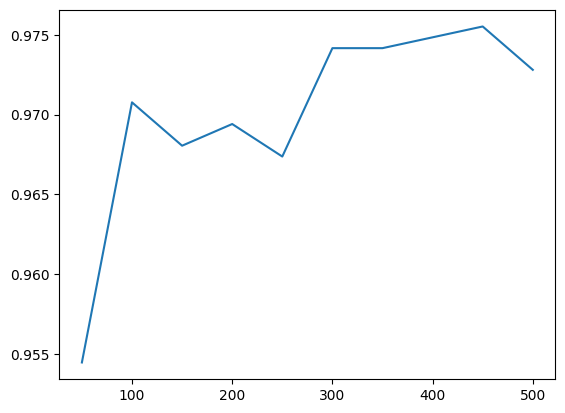

In [ ]:
feature_importances = plot_feature_importance(model_1.feature_importances_, train_x.columns, result_only = True)

def cut_feature_n_fit(feature_name, train_x, train_y1, model):
    cutted_train_x = train_x.loc[:, feature_name]

    model.fit(cutted_train_x, train_y1)
    return model


scores = []
for i in range(500, 0, -50):

    cutted_feature = feature_importances[:i]['feature_name']

    model_2_1 = cut_feature_n_fit(cutted_feature, train_static_x, train_static_y1, RandomForestClassifier())
    model_2_2 = cut_feature_n_fit(cutted_feature, train_dynamic_x, train_dynamic_y1, RandomForestClassifier())

    scores.append(pipeline_predict(new_data, model_1, model_2_1, model_2_2, output=False, cutted_feature=cutted_feature))

sns.lineplot(x=range(500, 0, -50),y=scores)
plt.show()